<a href="https://colab.research.google.com/github/Rajat-Kumar-Pandey/MACHINE-LEARNING/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


import some basic lib...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

divide dataset into independent and dependent feature

In [5]:
x = dataset.iloc[:,3:13]     # considering 3-12 col only
y = dataset.iloc[:, 13]      # considering 13th row

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


Feature engineering

In [8]:
geography = pd.get_dummies(x['Geography'],drop_first=True)

gender = pd.get_dummies(x['Gender'],drop_first=True)


In [9]:
# Explicitly convert True/False to 1/0
geography = geography.astype(int)
gender = gender.astype(int)

In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
## concatenate these var with dataframe

x=x.drop(['Geography','Gender'],axis=1)



In [12]:
x=pd.concat([x,geography,gender],axis=1)

In [13]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Spliting data set

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
## feature scalling

from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
x_train.shape

(8000, 11)

In [20]:
x_test.shape

(2000, 11)

create the ANN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [22]:
# innitiallize ANN
classifier = Sequential()

In [23]:
## adding the input layers

classifier.add(Dense(units=11,activation='relu'))

In [24]:
## add 1st hidden layer

classifier.add(Dense(units=8,activation='relu'))

In [25]:
## add 2nd hidden layers

classifier.add(Dense(units=6,activation='relu'))

In [26]:
## add output layer

classifier.add(Dense(1,activation='sigmoid'))

trainn ANN

In [27]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [29]:
classifier.compile(optimizer= opt ,loss = 'binary_crossentropy',metrics=['accuracy'])

In [30]:
## Early stoping
import tensorflow as tf

early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=25,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
modal_hist = classifier.fit(x_train,y_train,validation_split = 0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7661 - loss: 0.4955 - val_accuracy: 0.8258 - val_loss: 0.3826
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8410 - loss: 0.3690 - val_accuracy: 0.8379 - val_loss: 0.3814
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8550 - loss: 0.3460 - val_accuracy: 0.8273 - val_loss: 0.3970
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8558 - loss: 0.3482 - val_accuracy: 0.8531 - val_loss: 0.3517
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8572 - loss: 0.3437 - val_accuracy: 0.8550 - val_loss: 0.3543
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3334 - val_accuracy: 0.8474 - val_loss: 0.3619
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3373 - val_accuracy: 0.8531 - val_loss: 0.3642
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3292 - 

In [32]:
modal_hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

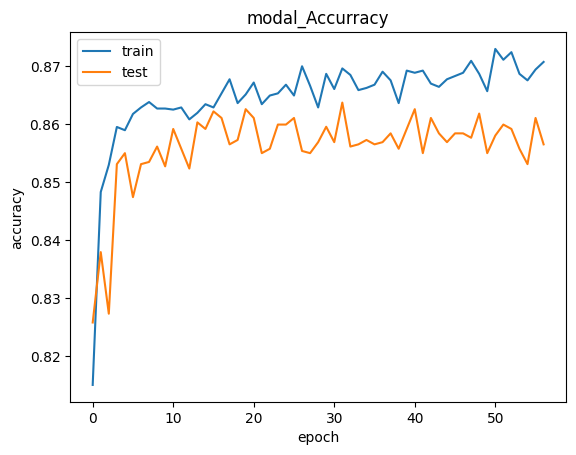

In [33]:
# Summarize history for accuracy
plt.plot(modal_hist.history['accuracy'])
plt.plot(modal_hist.history['val_accuracy'])
plt.title('modal_Accurracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

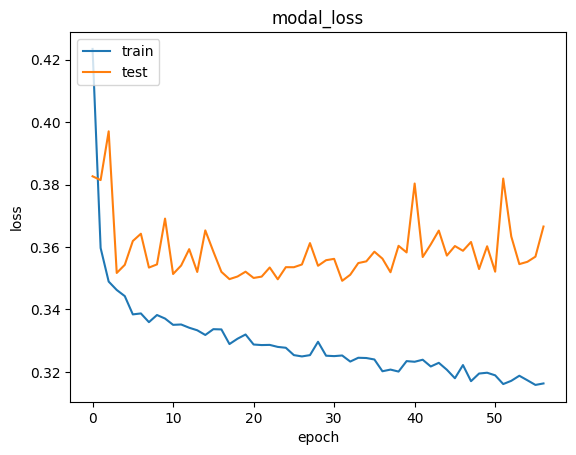

In [34]:
# Summarize history for loss
plt.plot(modal_hist.history['loss'])
plt.plot(modal_hist.history['val_loss'])
plt.title('modal_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [35]:
# pridicting the test set

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [36]:
## make confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 222,  183]])

In [37]:
## calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [38]:
score

0.8595

In [40]:
## get the weights

classifier.get_weights()

[array([[-0.12553197, -0.48258582,  1.2519586 , -0.5249633 ,  0.733345  ,
         -0.32679695, -1.0900397 , -0.04635099, -0.8114956 , -0.00510372,
         -0.4252072 ],
        [ 0.11086828,  0.55733794, -1.4294928 , -4.8042917 ,  2.2624676 ,
         -2.3756871 ,  4.259143  ,  0.88660926, -1.313977  ,  3.3970199 ,
          0.08464755],
        [-1.037972  , -0.94869614,  1.0777608 , -0.25155157, -0.19737248,
          0.03399148, -1.3043984 ,  0.6329228 , -1.346367  ,  0.3397269 ,
          0.35915074],
        [ 1.9501272 ,  1.4521203 , -0.03337806, -0.6270283 ,  0.5686008 ,
         -1.7439963 ,  0.05439835,  0.9791804 ,  1.9736761 , -0.23893017,
         -3.2826607 ],
        [ 1.1581881 ,  2.913817  , -2.564554  , -1.5770144 ,  0.25611982,
         -0.12629022, -1.5491835 ,  3.002768  , -1.1321926 ,  1.2650154 ,
         -3.9274786 ],
        [ 0.6873256 , -0.3227703 ,  3.2195559 , -0.0433061 , -0.5605614 ,
         -0.09849687, -0.19735348,  0.5753373 , -0.05525901,  0.7197972

In [42]:

# Save the model in the native Keras format
classifier.save('Churn_modelling.keras')
